In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

1) Shape of dataset: (45211, 17)

2) Columns:
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

3) First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no



4) Data types & non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

5) Target distributio

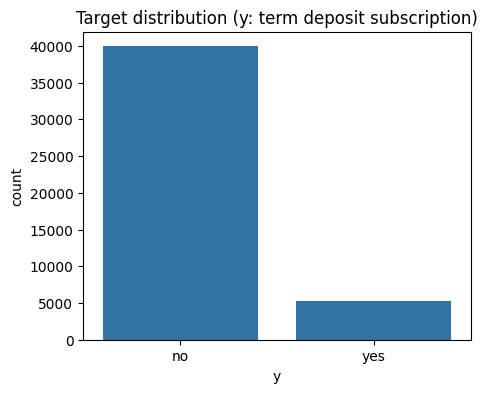


6) Missing / Null values per column:
 age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

7) Value counts for 'poutcome':
poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64


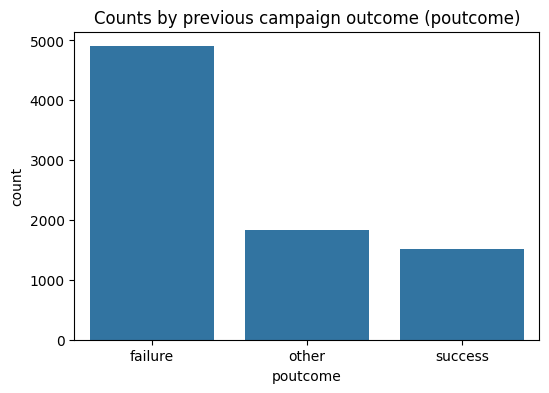


8) Proportion of subscription by 'poutcome' (rows sum to 1):
 y               no       yes
poutcome                    
failure   0.873903  0.126097
other     0.833152  0.166848
success   0.352747  0.647253


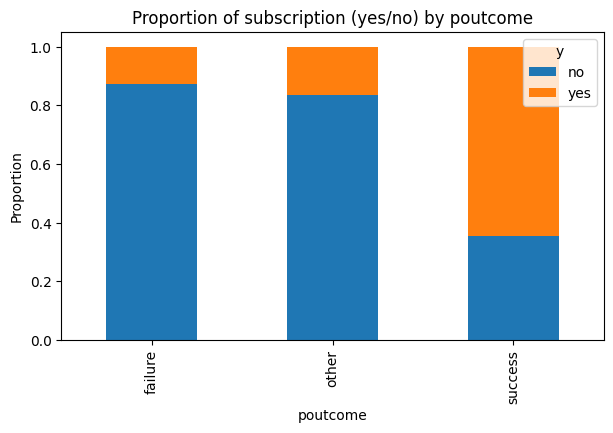


9) Rationale: 'poutcome' (previous campaign outcome) is chosen because it is
   available before the new call and captures prior customer response (unknown/other/failure/success).

10) Encoded feature columns: ['poutcome_other', 'poutcome_success']


,poutcome_other,poutcome_success
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False



11) Train/Test sizes: (36168, 2) (9043, 2)

12) Evaluation on TEST set:
   Accuracy : 0.8932
   Precision: 0.6503
   Recall   : 0.1881
   F1 score : 0.2918
   ROC AUC  : 0.6014

13) Classification report:
              precision    recall  f1-score   support

           0     0.9017    0.9866    0.9422      7985
           1     0.6503    0.1881    0.2918      1058

    accuracy                         0.8932      9043
   macro avg     0.7760    0.5873    0.6170      9043
weighted avg     0.8723    0.8932    0.8661      9043



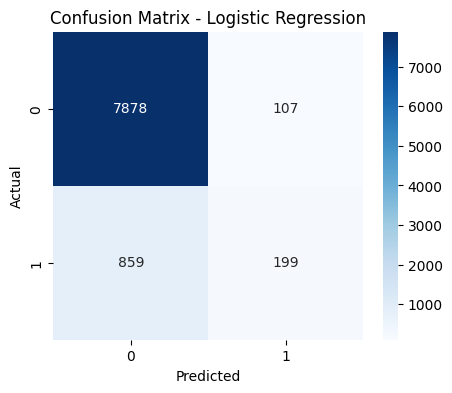

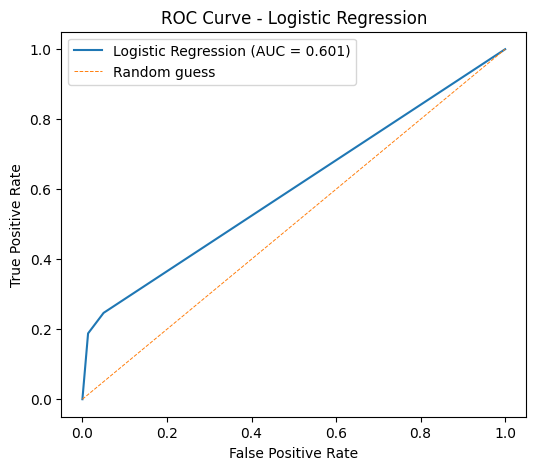


14) Model coefficients and odds ratios:


,feature,coefficient,odds_ratio
0,poutcome_success,2.835931,17.046255
1,poutcome_other,0.617457,1.854207



Intercept (log-odds): -2.2428

15) Interpretation notes:
 - Coefficients show how log-odds of subscribing change when that poutcome category is present
  (relative to the dropped baseline category).
 - Odds ratio > 1 means higher odds of subscription vs baseline; < 1 means lower odds.
 - Feature used (manual selection): 'poutcome' (previous campaign outcome).
 - Algorithm: Logistic Regression (interpretable baseline).
 - Reason: 'duration' is excluded because it's not available before the call; 'poutcome' is realistic for pre-call prediction.
 - Evaluation: Shown above (accuracy, precision, recall, F1, ROC-AUC).

You can now save this notebook, take screenshots of the EDA/plots, and push code + a short README to your GitHub for submission.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

# ---------- 1) Load dataset ----------
# The original line caused an error because the zip file contains multiple CSVs.
# Instead, we will use the data already fetched by ucimlrepo in the previous cell.
# Combine features (X) and targets (y) from ucimlrepo into a single DataFrame 'df'.
df = pd.concat([bank_marketing.data.features, bank_marketing.data.targets], axis=1)

# ---------- 2) Quick EDA (stepwise) ----------
print("1) Shape of dataset:", df.shape)
print("\n2) Columns:\n", df.columns.tolist())
print("\n3) First 5 rows:")
display(df.head())
print("\n4) Data types & non-null counts:")
print(df.info())

print("\n5) Target distribution (y):")
print(df['y'].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x='y', data=df)
plt.title('Target distribution (y: term deposit subscription)')
plt.show()

# Check missing values (there are none as dataset uses 'unknown' for unknowns)
print("\n6) Missing / Null values per column:\n", df.isnull().sum())

# Inspect chosen manual feature: 'poutcome'
print("\n7) Value counts for 'poutcome':")
print(df['poutcome'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='poutcome', data=df, order=df['poutcome'].value_counts().index)
plt.title("Counts by previous campaign outcome (poutcome)")
plt.show()

# Crosstab: proportion of subscription by poutcome
ct = pd.crosstab(df['poutcome'], df['y'], normalize='index')
print("\n8) Proportion of subscription by 'poutcome' (rows sum to 1):\n", ct)
ct.plot(kind='bar', stacked=True, figsize=(7,4))
plt.title("Proportion of subscription (yes/no) by poutcome")
plt.ylabel("Proportion")
plt.show()

# ---------- 3) Reason for choosing 'poutcome' ----------
print("\n9) Rationale: 'poutcome' (previous campaign outcome) is chosen because it is\n   available before the new call and captures prior customer response (unknown/other/failure/success).")

# ---------- 4) Prepare data using only 'poutcome' (manual feature) ----------
# Convert target to binary 0/1
y = (df['y'] == 'yes').astype(int)

# One-hot encode poutcome using pandas (drop one column to avoid multicollinearity)
X = pd.get_dummies(df['poutcome'], prefix='poutcome', drop_first=True)
print("\n10) Encoded feature columns:", X.columns.tolist())
display(X.head())

# ---------- 5) Train-test split ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("\n11) Train/Test sizes:", X_train.shape, X_test.shape)

# ---------- 6) Train Logistic Regression ----------
# Use solver suitable for small feature set; set max_iter high for safety
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# ---------- 7) Predictions and Probabilities ----------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# ---------- 8) Evaluation metrics ----------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\n12) Evaluation on TEST set:")
print(f"   Accuracy : {acc:.4f}")
print(f"   Precision: {prec:.4f}")
print(f"   Recall   : {rec:.4f}")
print(f"   F1 score : {f1:.4f}")
print(f"   ROC AUC  : {roc_auc:.4f}")

print("\n13) Classification report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1], '--', linewidth=0.7, label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# ---------- 9) Model interpretation ----------
coef = model.coef_[0]
intercept = model.intercept_[0]
feature_names = X.columns.tolist()
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coef})
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
print("\n14) Model coefficients and odds ratios:")
display(coef_df.sort_values(by='odds_ratio', ascending=False).reset_index(drop=True))
print(f"\nIntercept (log-odds): {intercept:.4f}")

# Short interpretation:
print("\n15) Interpretation notes:")
print(" - Coefficients show how log-odds of subscribing change when that poutcome category is present\n  (relative to the dropped baseline category).")
print(" - Odds ratio > 1 means higher odds of subscription vs baseline; < 1 means lower odds.")


print(" - Feature used (manual selection): 'poutcome' (previous campaign outcome).")
print(" - Algorithm: Logistic Regression (interpretable baseline).")
print(" - Reason: 'duration' is excluded because it's not available before the call; 'poutcome' is realistic for pre-call prediction.")
print(" - Evaluation: Shown above (accuracy, precision, recall, F1, ROC-AUC).")
print("\nYou can now save this notebook, take screenshots of the EDA/plots, and push code + a short README to your GitHub for submission.")